In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM polkadot''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Polkadot,DOT,2020-08-21 23:59:59,3.090093,2.730919,2.896923,2.875028,4.931314e+07,0.0
1,2,Polkadot,DOT,2020-08-22 23:59:59,4.510613,2.816762,2.878570,4.484690,4.858011e+08,0.0
2,3,Polkadot,DOT,2020-08-23 23:59:59,4.487058,3.716271,4.487058,3.967066,3.207495e+08,0.0
3,4,Polkadot,DOT,2020-08-24 23:59:59,4.783158,3.812670,3.987413,4.602614,4.076902e+08,0.0
4,5,Polkadot,DOT,2020-08-25 23:59:59,5.760775,4.501223,4.584953,5.523393,8.988475e+08,0.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        320 non-null    object 
 1   Symbol      320 non-null    object 
 2   Date        320 non-null    object 
 3   High        320 non-null    float64
 4   Low         320 non-null    float64
 5   Open        320 non-null    float64
 6   Close       320 non-null    float64
 7   Volume      320 non-null    float64
 8   Marketcap   320 non-null    float64
 9   Range       320 non-null    float64
 10  Difference  320 non-null    float64
dtypes: float64(8), object(3)
memory usage: 27.6+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        320 non-null    object        
 1   Symbol      320 non-null    object        
 2   Date        320 non-null    datetime64[ns]
 3   High        320 non-null    float64       
 4   Low         320 non-null    float64       
 5   Open        320 non-null    float64       
 6   Close       320 non-null    float64       
 7   Volume      320 non-null    float64       
 8   Marketcap   320 non-null    float64       
 9   Range       320 non-null    float64       
 10  Difference  320 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 27.6+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,320.000000,320.000000,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000,320.000000
mean,19.131720,16.957486,18.107145,18.143080,2.006507e+09,1.653354e+10,2.174233,0.035935
std,14.481531,12.917678,13.762707,13.735707,1.692224e+09,1.305124e+10,2.437638,1.812524
min,3.090093,2.730919,2.878570,2.875028,4.931314e+07,0.000000e+00,0.093394,-15.461676
25%,5.132771,4.648561,4.858942,4.883383,6.073563e+08,4.191878e+09,0.427919,-0.484597
50%,16.671923,14.862697,15.793144,15.979432,1.605773e+09,1.487376e+10,1.547449,-0.007782
75%,34.267825,29.942827,32.720427,32.742904,2.942210e+09,3.027253e+10,3.059609,0.479611
max,49.692960,42.976323,47.959780,47.945940,1.007000e+10,4.497358e+10,22.705206,7.978388


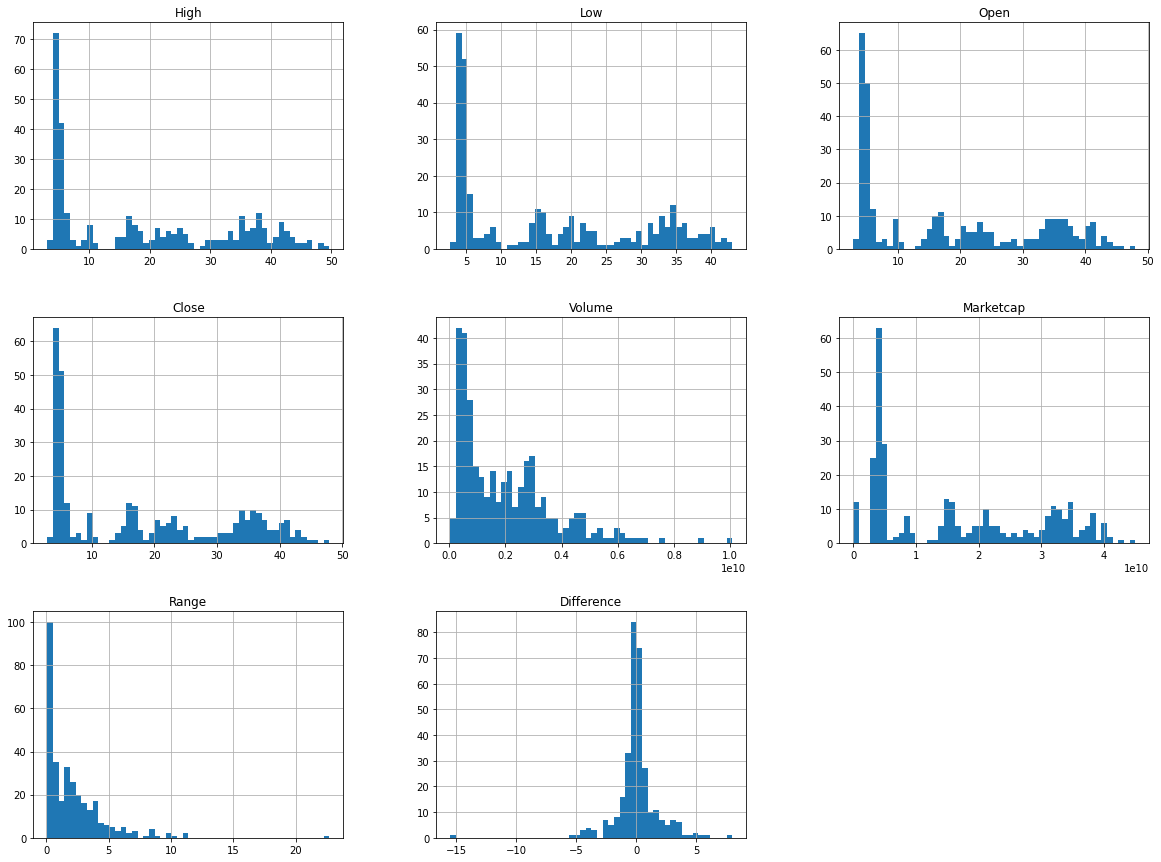

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,271,240,304,264,273,267,275,215,229,262
Date,2021-05-19 23:59:59,2021-04-18 23:59:59,2021-06-21 23:59:59,2021-05-12 23:59:59,2021-05-21 23:59:59,2021-05-15 23:59:59,2021-05-23 23:59:59,2021-03-24 23:59:59,2021-04-07 23:59:59,2021-05-10 23:59:59
Difference,-15.461676,-5.2146,-4.868336,-4.61983,-4.551854,-4.421149,-4.040235,-4.015834,-3.826695,-3.758451


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,266,257,276,148,265,183,272,182,248,146
Date,2021-05-14 23:59:59,2021-05-05 23:59:59,2021-05-24 23:59:59,2021-01-16 23:59:59,2021-05-13 23:59:59,2021-02-20 23:59:59,2021-05-20 23:59:59,2021-02-19 23:59:59,2021-04-26 23:59:59,2021-01-14 23:59:59
Difference,7.978388,5.727232,5.276589,4.982374,4.974787,4.445064,4.090074,3.604071,3.592969,3.591174


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

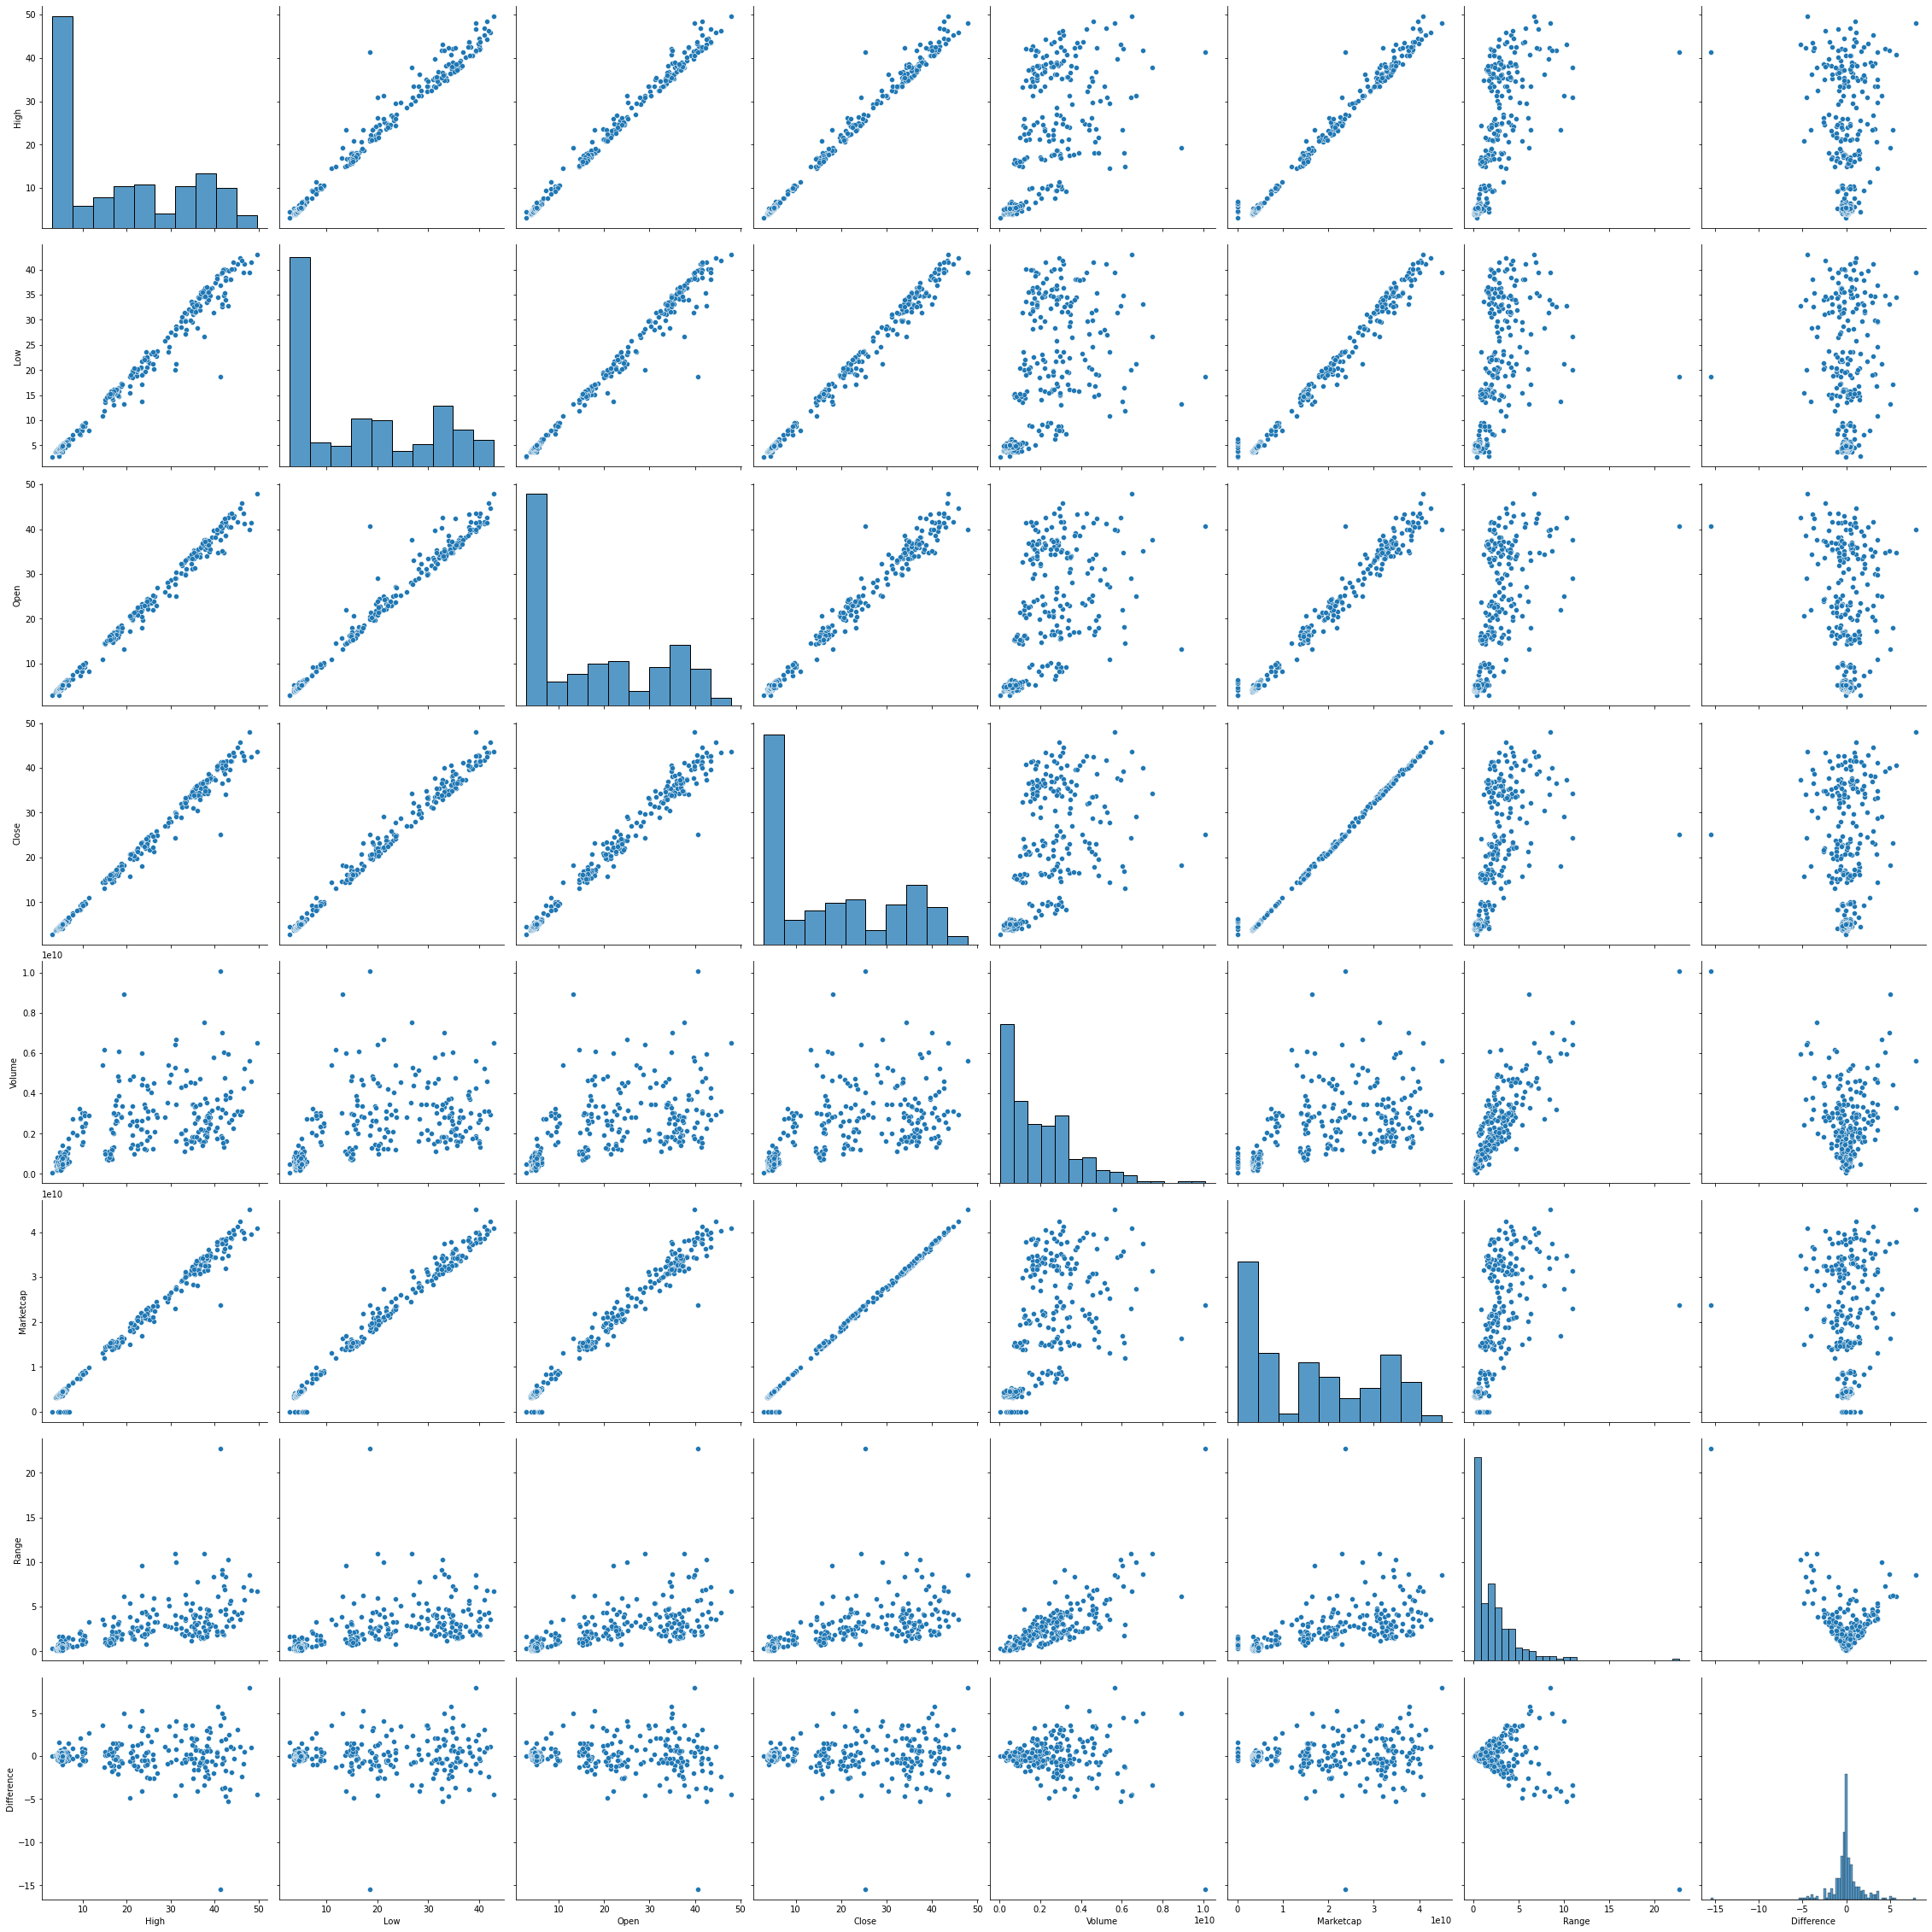

In [15]:
sns.pairplot(data,height=4);
